#### Applying K-Means Clustering Algorithm to the dataset named "Customer_Savings_Expense_List"

 - A Bank dataset containing the details of the customer including the main three features named "expenses", "savings" and "balance"

Importing all the required libraries required for applying the algorithm since all the packages are pre-installed.

--> Numpy - It is a powerful numerical computing library in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

--> Pandas - It is a powerful and popular open-source data manipulation and analysis library for Python. It provides data structures for efficiently storing and manipulating large datasets, along with tools for reading and writing data in different file formats.

--> Sklearn - Scikit-learn is a popular machine learning library for Python that provides simple and efficient tools for data analysis and modeling. It is built on NumPy, SciPy, and Matplotlib and provides a wide range of machine learning algorithms for tasks such as classification, regression, clustering, and dimensionality reduction.

--> matplotlib - It is a comprehensive 2D plotting library for Python. It produces high-quality static, animated, and interactive visualizations in Python. Matplotlib is designed to work seamlessly with NumPy, providing an easy way to visualize data and results from numerical computations.

--> seaborn - It is a comprehensive 2D plotting library for Python. It produces high-quality static, animated, and interactive visualizations in Python. Matplotlib is designed to work seamlessly with NumPy, providing an easy way to visualize data and results from numerical computations.

--> Setting OMP_NUM_THREADS to '1' is a way to control the number of threads that Open MP-enabled programs will use. By setting it to '1', we are instructing the program to use only one thread, effectively limiting parallelism.

In [2]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#running before importing k means
import os 
os.environ["OMP_NUM_THREADS"] = '1'

In [3]:
#We are now going to use the read_csv() function in the pandas library to read our "Customer_Savings_Expense_List.csv" dataset into a pandas Data Frame.
customer_savings_expense_list = pd.read_csv('Customer_Savings_Expense_List.csv')

In [4]:
customer_savings_expense_list.head() #to display the first few rows of the dataset

,first_name,second_name,address,date_of_birth,sex,account_number,sort_code,month,year,salary_credited,savings,expenses
0,Dominic,Lewis,"014 Shaw Locks, Lake Rachelbury, AR 55295",11.07.1953,Female,58251861,610192,7,2015,55795.0,2308.0,53487.0
1,Kathleen,Harrington,"869 Green Shoal Apt. 841, Savannahstad, AK 09976",07.12.1991,Female,24518702,664911,12,2023,40860.0,3747.0,37113.0
2,Joseph,Dyer,"585 Craig Isle Suite 607, Blackwellstad, IL 79586",03.07.2000,Male,49928376,241669,11,2021,116820.0,1081.0,115739.0
3,Timothy,Rodgers,"587 Mark Street, North Benjamin, OK 24196",23.08.1996,Male,80839435,505494,11,2014,94886.0,1513.0,93373.0
4,Christopher,Horton,"537 Blackburn Islands Suite 856, Mccormickburg...",19.03.1975,Female,4158853,850568,4,2016,46265.0,2920.0,43345.0


In [5]:
customer_savings_expense_list.tail() ##to display the last few rows of the dataset

,first_name,second_name,address,date_of_birth,sex,account_number,sort_code,month,year,salary_credited,savings,expenses
1095,David,Edwards,"6296 Mandy Pines Suite 104, North Julieville, ...",06.07.1994,Female,6425109,311111,2,2020,93394.0,2608.0,14641.0
1096,Spencer,Smith,"35427 Alexandra Point, West Joseph, NM 65298",14.06.1991,Male,7572642,262305,3,2021,NaN,4232.0,26778.0
1097,Jerry,Black,"90996 Zimmerman Drive, New Glennview, AR 58223",17.02.1953,Female,97143520,593043,4,2017,76220.0,4752.0,29264.0
1098,Steven,Reed,"106 Wilson Knolls Apt. 660, Vickieshire, MT 86596",11.08.1974,Male,48735189,923231,1,2020,81874.0,2112.0,10075.0
1099,Stephen,Yu,"46301 James Spur Apt. 126, Lake Alvin, CA 73036",23.11.1999,Male,32110006,508428,6,2014,53859.0,1687.0,15412.0


In [6]:
# to generate descriptive statistics of the numerical columns, we can use the below code. It provides information such as the mean, standard deviation, minimum, maximum, and various percentiles. 

customer_savings_expense_list.describe()

,account_number,sort_code,month,year,salary_credited,savings,expenses
count,1.100000e+03,1100.000000,1100.000000,1100.00000,1059.000000,1078.000000,1096.000000
mean,5.022115e+07,493896.145455,6.630909,2016.48000,79344.407932,2972.320037,68631.160584
std,2.902330e+07,284176.700851,3.419974,3.99255,23463.388189,1175.300051,30239.384820
min,3.555800e+04,613.000000,1.000000,2010.00000,40055.000000,1001.000000,1101.000000
25%,2.497276e+07,255815.500000,4.000000,2013.00000,59076.000000,1954.250000,46715.750000
50%,4.945225e+07,490377.500000,7.000000,2016.00000,79384.000000,2976.500000,71308.500000
75%,7.498169e+07,733867.000000,9.250000,2020.00000,99327.000000,4028.750000,93893.750000
max,9.992523e+07,999244.000000,12.000000,2023.00000,119909.000000,4999.000000,118795.000000


In [7]:
#to obtain a concise summary of the DataFrame's structure, including information about the data types, non-null values, and memory usage.

customer_savings_expense_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   first_name       1100 non-null   object 
 1   second_name      1100 non-null   object 
 2   address          1100 non-null   object 
 3   date_of_birth    1100 non-null   object 
 4   sex              1100 non-null   object 
 5   account_number   1100 non-null   int64  
 6   sort_code        1100 non-null   int64  
 7   month            1100 non-null   int64  
 8   year             1100 non-null   int64  
 9   salary_credited  1059 non-null   float64
 10  savings          1078 non-null   float64
 11  expenses         1096 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 103.3+ KB


In [8]:
#to find is there any null values in any of the cells, we can use:

customer_savings_expense_list.iloc[:,:].isnull()

,first_name,second_name,address,date_of_birth,sex,account_number,sort_code,month,year,salary_credited,savings,expenses
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,False,False,False,False,False,False,False,False,False,False,False,False
1096,False,False,False,False,False,False,False,False,False,True,False,False
1097,False,False,False,False,False,False,False,False,False,False,False,False
1098,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
customer_savings_expense_list.iloc[:,:].isnull().values.any()

True

In [10]:
customer_savings_expense_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   first_name       1100 non-null   object 
 1   second_name      1100 non-null   object 
 2   address          1100 non-null   object 
 3   date_of_birth    1100 non-null   object 
 4   sex              1100 non-null   object 
 5   account_number   1100 non-null   int64  
 6   sort_code        1100 non-null   int64  
 7   month            1100 non-null   int64  
 8   year             1100 non-null   int64  
 9   salary_credited  1059 non-null   float64
 10  savings          1078 non-null   float64
 11  expenses         1096 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 103.3+ KB


In [11]:
customer_savings_expense_list.isnull().sum()

first_name          0
second_name         0
address             0
date_of_birth       0
sex                 0
account_number      0
sort_code           0
month               0
year                0
salary_credited    41
savings            22
expenses            4
dtype: int64

Here, the feature "age" and "scl_abs" contains null values, so we need to impute it so as to continue with our K-Means Clustering Algorithm. Hence, we need to install a package called "sklearn"

In [12]:
!pip install scikit-learn

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
imputedValue = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputedValue = imputedValue.fit(customer_savings_expense_list[['salary_credited','expenses','savings']])
customer_savings_expense_list[['salary_credited','expenses','savings']] = imputedValue.transform(customer_savings_expense_list[['salary_credited','expenses','savings']])
customer_savings_expense_list.head()

,first_name,second_name,address,date_of_birth,sex,account_number,sort_code,month,year,salary_credited,savings,expenses
0,Dominic,Lewis,"014 Shaw Locks, Lake Rachelbury, AR 55295",11.07.1953,Female,58251861,610192,7,2015,55795.0,2308.0,53487.0
1,Kathleen,Harrington,"869 Green Shoal Apt. 841, Savannahstad, AK 09976",07.12.1991,Female,24518702,664911,12,2023,40860.0,3747.0,37113.0
2,Joseph,Dyer,"585 Craig Isle Suite 607, Blackwellstad, IL 79586",03.07.2000,Male,49928376,241669,11,2021,116820.0,1081.0,115739.0
3,Timothy,Rodgers,"587 Mark Street, North Benjamin, OK 24196",23.08.1996,Male,80839435,505494,11,2014,94886.0,1513.0,93373.0
4,Christopher,Horton,"537 Blackburn Islands Suite 856, Mccormickburg...",19.03.1975,Female,4158853,850568,4,2016,46265.0,2920.0,43345.0


In [15]:
#re - check null values, if present or not
customer_savings_expense_list.iloc[:,:].isnull().values.any()

False

In [16]:
customer_savings_expense_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   first_name       1100 non-null   object 
 1   second_name      1100 non-null   object 
 2   address          1100 non-null   object 
 3   date_of_birth    1100 non-null   object 
 4   sex              1100 non-null   object 
 5   account_number   1100 non-null   int64  
 6   sort_code        1100 non-null   int64  
 7   month            1100 non-null   int64  
 8   year             1100 non-null   int64  
 9   salary_credited  1100 non-null   float64
 10  savings          1100 non-null   float64
 11  expenses         1100 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 103.3+ KB


Hence confirmed that there is no null values in the dataset all those had have been SimpleImputed by the methodology. Now, let's consider the column feature names and those are not per the standards. Thus, changing the features by the below codeline:

In [17]:
#storing the new feature names needed into a new variable
feature_name_modified = {'first_name': 'frst_nm', 'second_name': 'sec_nm', 'address': 'addr', 'date_of_birth':'dob','account_number':'acc_num','sort_code':'srt_cde','month':'mon','year':'yr','salary_credited':'sal_crdtd','expenses':'exp','savings':'savngs'}
#change the feature name of our dataset
customer_savings_expense_list = customer_savings_expense_list.rename(columns=feature_name_modified)
customer_savings_expense_list.head() #to check the difference in the feature names

,frst_nm,sec_nm,addr,dob,sex,acc_num,srt_cde,mon,yr,sal_crdtd,savngs,exp
0,Dominic,Lewis,"014 Shaw Locks, Lake Rachelbury, AR 55295",11.07.1953,Female,58251861,610192,7,2015,55795.0,2308.0,53487.0
1,Kathleen,Harrington,"869 Green Shoal Apt. 841, Savannahstad, AK 09976",07.12.1991,Female,24518702,664911,12,2023,40860.0,3747.0,37113.0
2,Joseph,Dyer,"585 Craig Isle Suite 607, Blackwellstad, IL 79586",03.07.2000,Male,49928376,241669,11,2021,116820.0,1081.0,115739.0
3,Timothy,Rodgers,"587 Mark Street, North Benjamin, OK 24196",23.08.1996,Male,80839435,505494,11,2014,94886.0,1513.0,93373.0
4,Christopher,Horton,"537 Blackburn Islands Suite 856, Mccormickburg...",19.03.1975,Female,4158853,850568,4,2016,46265.0,2920.0,43345.0


In [18]:
customer_savings_expense_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   frst_nm    1100 non-null   object 
 1   sec_nm     1100 non-null   object 
 2   addr       1100 non-null   object 
 3   dob        1100 non-null   object 
 4   sex        1100 non-null   object 
 5   acc_num    1100 non-null   int64  
 6   srt_cde    1100 non-null   int64  
 7   mon        1100 non-null   int64  
 8   yr         1100 non-null   int64  
 9   sal_crdtd  1100 non-null   float64
 10  savngs     1100 non-null   float64
 11  exp        1100 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 103.3+ KB


Hence the pre-processing steps got completed. Let's begin with the clustering algorithm hereby. In the dataset, lets check on which factor the quality of the red wine depends upon, for that, plot a histogram to check the feature one after one.

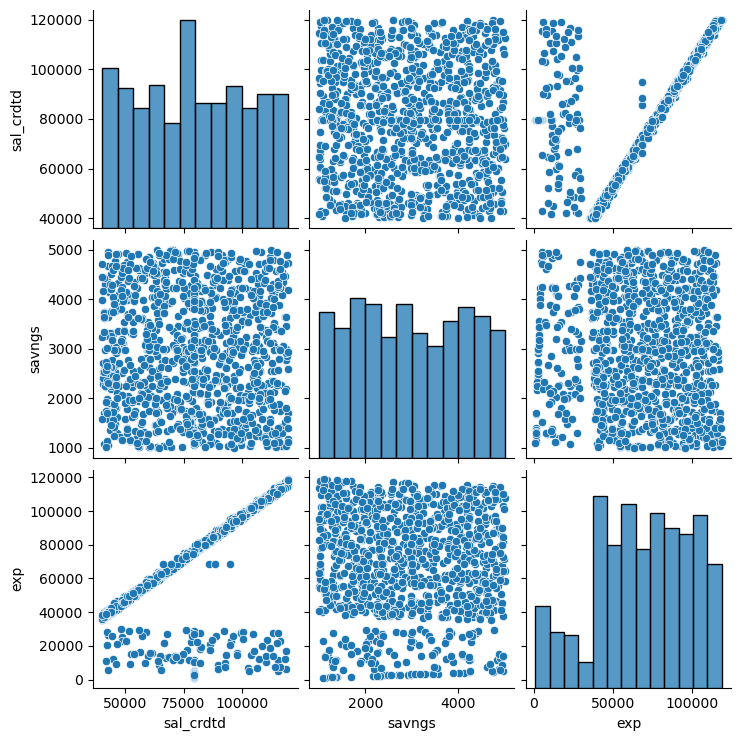

In [19]:
sns.pairplot(customer_savings_expense_list.iloc[:,[9,10,11]])

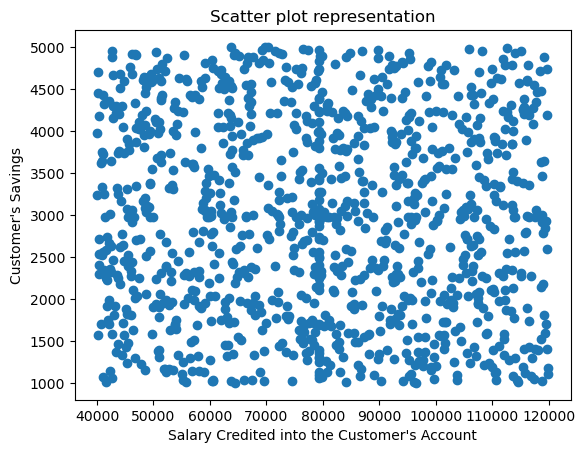

In [20]:
plt.scatter(customer_savings_expense_list['sal_crdtd'],customer_savings_expense_list['savngs'])
plt.title('Scatter plot representation')
plt.xlabel("Salary Credited into the Customer's Account")
plt.ylabel("Customer's Savings")
plt.show()

first lets try clustering with only two variables:- 

--> "salary credited" -  sal_crdtd

--> "savings" - savngs

Use the iloc() function to select the two columns we want, and then we apply scaling to the data. Because K-means relies on a distance metric, scaling can have a big impact on the results. 

For example, if one of our variables had valuesfrom 10,000 to 100,000 and the other had values from 0 to 1, the Euclidean distance will end up being dominated by the first of the variables. For this reason, we will normally perform Min-Max scaling or normalisation beforecarrying out clustering.

In [21]:
from sklearn.preprocessing import StandardScaler
scaled_output = customer_savings_expense_list.iloc[:,[9,11]].values
standard_scaler = StandardScaler()
scaled_output = standard_scaler.fit_transform(scaled_output)
scaled_output

array([[-1.02339379, -0.50195125],
       [-1.67242863, -1.04466536],
       [ 1.62858821,  1.56138325],
       ...,
       [-0.13577835, -1.30481945],
       [ 0.10992925, -1.94083638],
       [-1.10752713, -1.7639422 ]])

Additionally, we will apply the elbow method to determine the ideal number of K-means clusters. 

The within cluster sum of squares (wcss) for the data with different values of k is calculated using the elbow method. The reduction of this value is the goal of K-means clustering. As a result, we can plot the evolution of wcss with increasing cluster count. 

When we add more clusters, the wcss tends to decrease more slowly after a certain point. It initially decreases quickly. The "elbow" in the graph, where the decline in wcss slows down, represents the optimal number of clusters. 

This code makes use of Scitkit. Acquire the knowledge of executing K-means clustering, wherein k can range from 1 to 10, and store the resultant WCS in an array. Next, we use matplotlib to plot this. This elbow looks to be at k = 4. 

I want to make one thing clear to you here. I've noticed that random_state = 42 is used by most people; I have also used it. There is a single fixed shuffled dataset for random_state value 42, as shown in the above image. It implies that a shuffled dataset will be returned each time we use 42 as random_state.

/Users/macbookair/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbookair/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbookair/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbookair/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

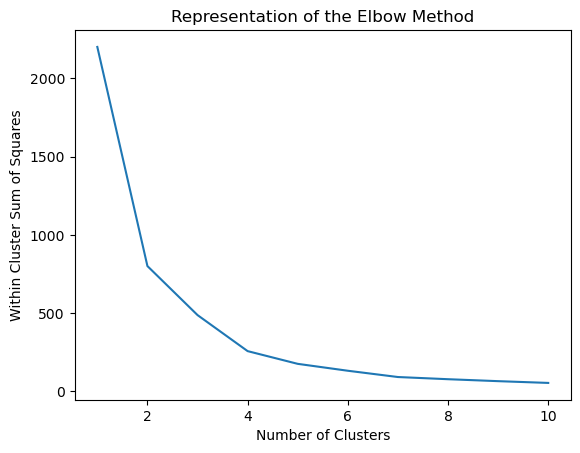

In [22]:
#using the elbow method top find the optimal number of clusters
from sklearn.cluster import KMeans
within_cluster_sum_of_squares = []
for i in range(1,11):
    k_means = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    k_means.fit(scaled_output)
    within_cluster_sum_of_squares.append(k_means.inertia_)
plt.plot(range(1,11),within_cluster_sum_of_squares)
plt.title('Representation of the Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

Now we have identified the optimal number of clusters we can use the fit_predict() method to train a KMeans() method on the dataset "customer_savings_expense_list" is 4 since the elbow in the graph shown above is at 4. Hence, we can write the code so as to fit the K-means Clustering into our dataset

In [23]:
#fitting k-means to the dataset
k_means = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
result_of_kmeans= k_means.fit_predict(scaled_output)
scaled_output[result_of_kmeans]

/Users/macbookair/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[ 1.62858821,  1.56138325],
       [ 1.62858821,  1.56138325],
       [ 0.6753957 ,  0.82006507],
       ...,
       [-1.02339379, -0.50195125],
       [-1.02339379, -0.50195125],
       [ 1.62858821,  1.56138325]])

We can plot a scatterplot of the resultant data with the cluster assignments and centroids displayed by using the code below, which displays each cluster in a different color. The colors will distinct the clusters for better understandings

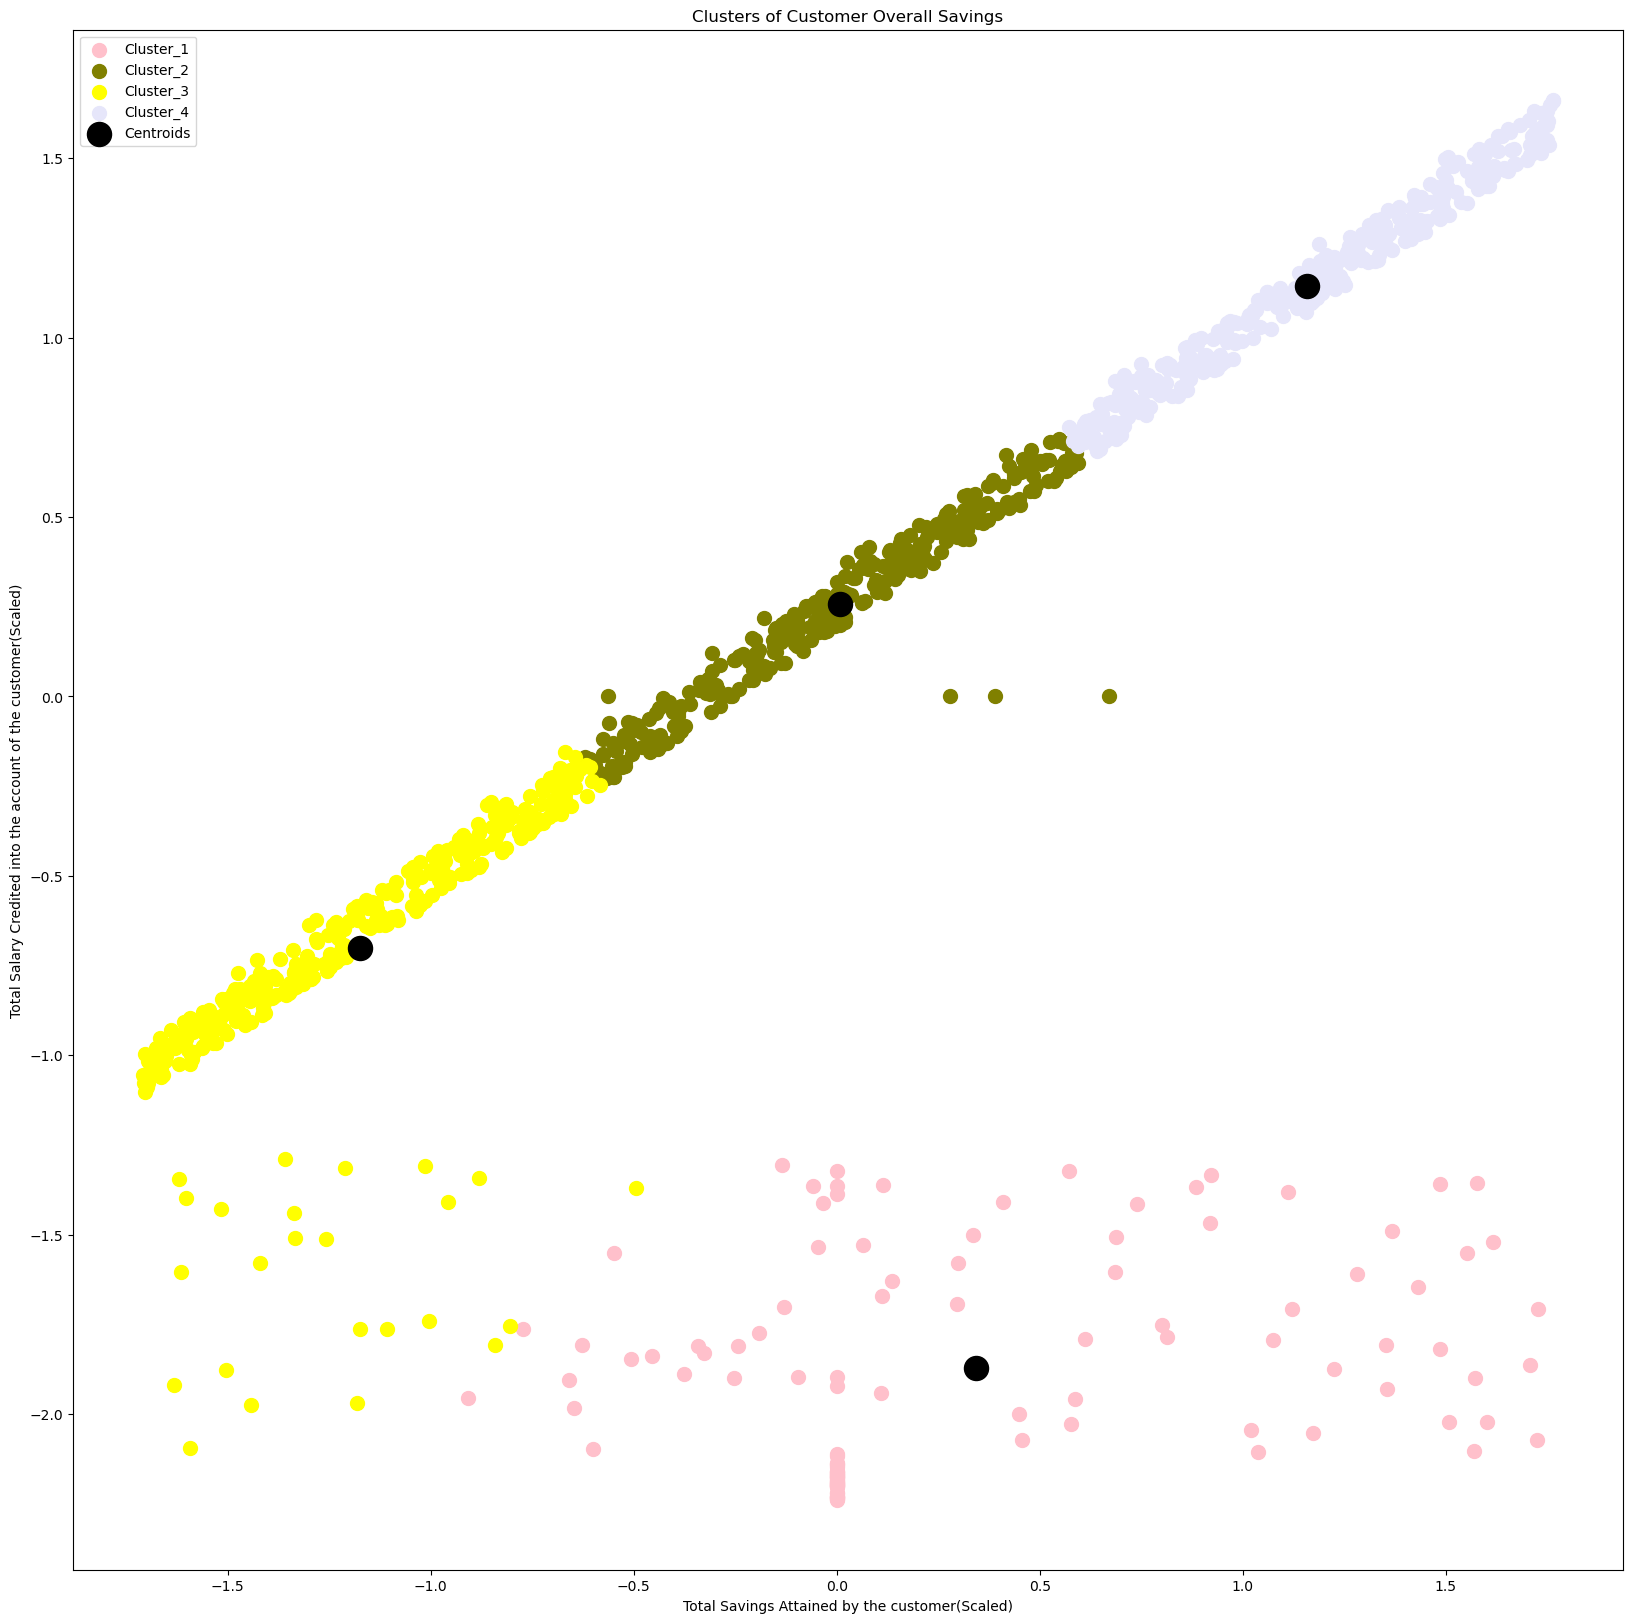

In [24]:
#visualizing the clusters
plt.figure(figsize=(20,20))
plt.scatter(scaled_output[result_of_kmeans == 0,0],scaled_output[result_of_kmeans == 0,1], s= 100, c = 'pink', label = 'Cluster_1')
plt.scatter(scaled_output[result_of_kmeans == 1,0],scaled_output[result_of_kmeans == 1,1], s= 100, c = 'Olive', label = 'Cluster_2')
plt.scatter(scaled_output[result_of_kmeans == 2,0],scaled_output[result_of_kmeans == 2,1], s= 100, c = 'yellow', label = 'Cluster_3')
plt.scatter(scaled_output[result_of_kmeans == 3,0],scaled_output[result_of_kmeans == 3,1], s= 100, c = 'lavender', label = 'Cluster_4')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1], s= 300, c = 'black', label = 'Centroids')
plt.ylabel('Total Salary Credited into the account of the customer(Scaled)')
plt.xlabel('Total Savings Attained by the customer(Scaled)')
plt.title('Clusters of Customer Overall Savings')
plt.legend()
plt.show()

The Silhouette Score is a metric used to calculate the goodness of a clustering technique (such as K-Means) on a given dataset. It provides a measure of how well-defined the clusters are in the data.

In [25]:
from sklearn.metrics import silhouette_score
# Get cluster assignments for each data point
labels = k_means.labels_

# Get centroids of clusters
centroids = k_means.cluster_centers_

# Calculate silhouette score
silhouette_avg = silhouette_score(scaled_output, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5696811674676969


### A score of 0.3887 is relatively positive, suggesting that the clusters are reasonably well-defined. 0.3887 falls closer to 1, which is a good sign. 

Secondly lets try clustering with only two variables:-

--> "salary credited" - sal_crdtd

--> "Expenses" - Expenses

Use the iloc() function to select the two columns we want, and then we apply scaling to the data. Because K-means relies on a distance metric, scaling can have a big impact on the results.

For example, if one of our variables had valuesfrom 10,000 to 100,000 and the other had values from 0 to 1, the Euclidean distance will end up being dominated by the first of the variables. For this reason, we will normally perform Min-Max scaling or normalisation beforecarrying out clustering.

In [26]:
from sklearn.preprocessing import StandardScaler
scaled_output_exp = customer_savings_expense_list.iloc[:,[10,11]].values
standard_scaler = StandardScaler()
scaled_output_exp = standard_scaler.fit_transform(scaled_output)
scaled_output_exp

array([[-1.02339379, -0.50195125],
       [-1.67242863, -1.04466536],
       [ 1.62858821,  1.56138325],
       ...,
       [-0.13577835, -1.30481945],
       [ 0.10992925, -1.94083638],
       [-1.10752713, -1.7639422 ]])

/Users/macbookair/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbookair/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbookair/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbookair/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

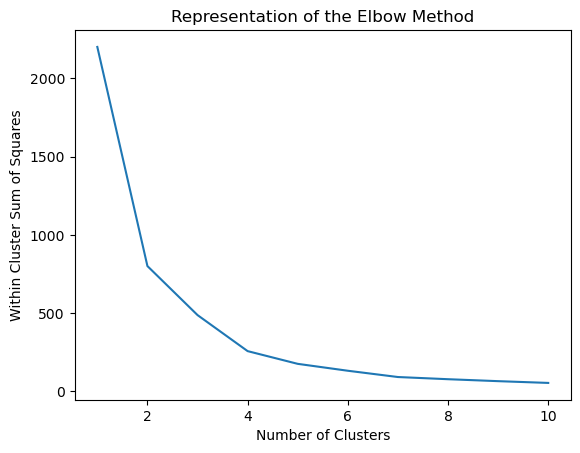

In [27]:
#using the elbow method top find the optimal number of clusters
from sklearn.cluster import KMeans
within_cluster_sum_of_squares = []
for i in range(1,11):
    k_means = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    k_means.fit(scaled_output_exp)
    within_cluster_sum_of_squares.append(k_means.inertia_)
plt.plot(range(1,11),within_cluster_sum_of_squares)
plt.title('Representation of the Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

In [28]:
#fitting k-means to the dataset
k_means_exp = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
result_of_kmeans_exp = k_means_exp.fit_predict(scaled_output_exp)
scaled_output_exp[result_of_kmeans_exp]

/Users/macbookair/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[ 1.62858821,  1.56138325],
       [ 1.62858821,  1.56138325],
       [ 0.6753957 ,  0.82006507],
       ...,
       [-1.02339379, -0.50195125],
       [-1.02339379, -0.50195125],
       [ 1.62858821,  1.56138325]])

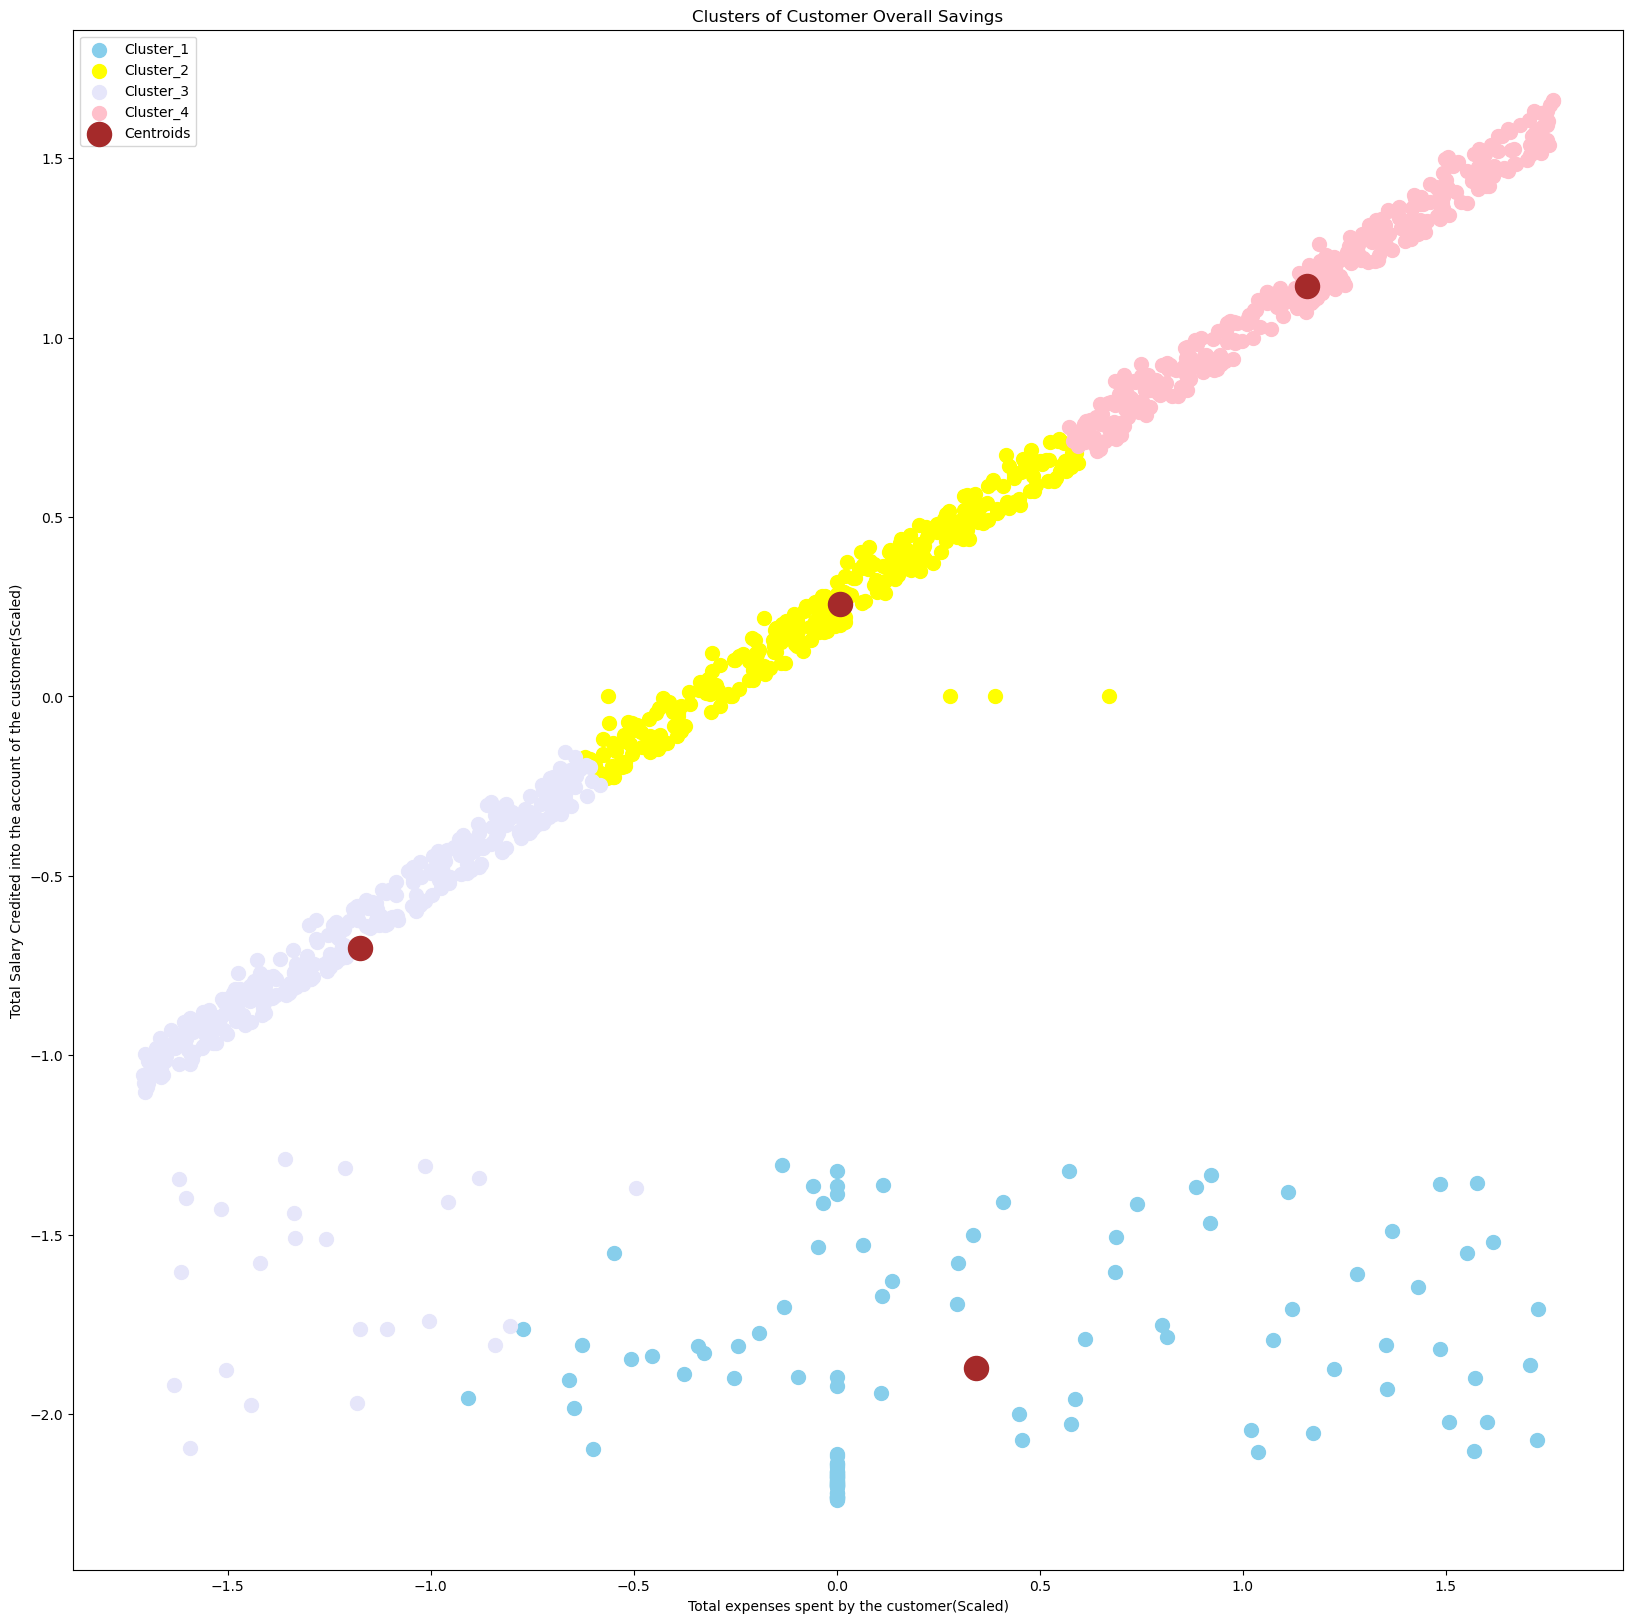

In [29]:
#visualizing the clusters
plt.figure(figsize=(20,20))
plt.scatter(scaled_output_exp[result_of_kmeans_exp == 0,0],scaled_output_exp[result_of_kmeans_exp == 0,1], s= 100, c = 'skyblue', label = 'Cluster_1')
plt.scatter(scaled_output_exp[result_of_kmeans_exp == 1,0],scaled_output_exp[result_of_kmeans_exp == 1,1], s= 100, c = 'yellow', label = 'Cluster_2')
plt.scatter(scaled_output_exp[result_of_kmeans_exp == 2,0],scaled_output_exp[result_of_kmeans_exp == 2,1], s= 100, c = 'lavender', label = 'Cluster_3')
plt.scatter(scaled_output_exp[result_of_kmeans_exp == 3,0],scaled_output_exp[result_of_kmeans_exp == 3,1], s= 100, c = 'pink', label = 'Cluster_4')
plt.scatter(k_means_exp.cluster_centers_[:,0],k_means_exp.cluster_centers_[:,1], s= 300, c = 'brown', label = 'Centroids')
plt.ylabel('Total Salary Credited into the account of the customer(Scaled)')
plt.xlabel('Total expenses spent by the customer(Scaled)')
plt.title('Clusters of Customer Overall Savings')
plt.legend()
plt.show()

In [30]:
from sklearn.metrics import silhouette_score
# Get cluster assignments for each data point
labels_exp = k_means_exp.labels_

# Get centroids of clusters
centroids_exp = k_means_exp.cluster_centers_

# Calculate silhouette score
silhouette_avg_exp = silhouette_score(scaled_output_exp, labels)
print(f"Silhouette Score: {silhouette_avg_exp}")

Silhouette Score: 0.5696811674676969


### A Silhouette Score of 0.5697 is generally considered quite good. The Silhouette Score ranges from -1 to 1. and a score value of 0.5697 is closer to 1, indicating that the clusters are well-separated and have a high level of cohesion and separation.

### Applying Hierarchical Clustering Algorithm to the dataset named "Customer_Savings_Expense_List"

Run the cell below to import the required function, and then to performhierarchical clustering and plot the resulting dendrogram. 

If you draw ahorizontal line across the dendrogram, the number of vertical lines crossing theline equates to the number of clusters. 

For example, from the below we couldend the clustering process at the point where the Euclidean distance is 12 andthis would give us three clusters (one formed of the orange data points, oneformed of the green data points, and one formed of the red data points shown onthe dendrogram). However, typically we take a horizontal line around halfwaydown the dendrogram to identify the optimal number of clusters, which in thiscase gives us five.

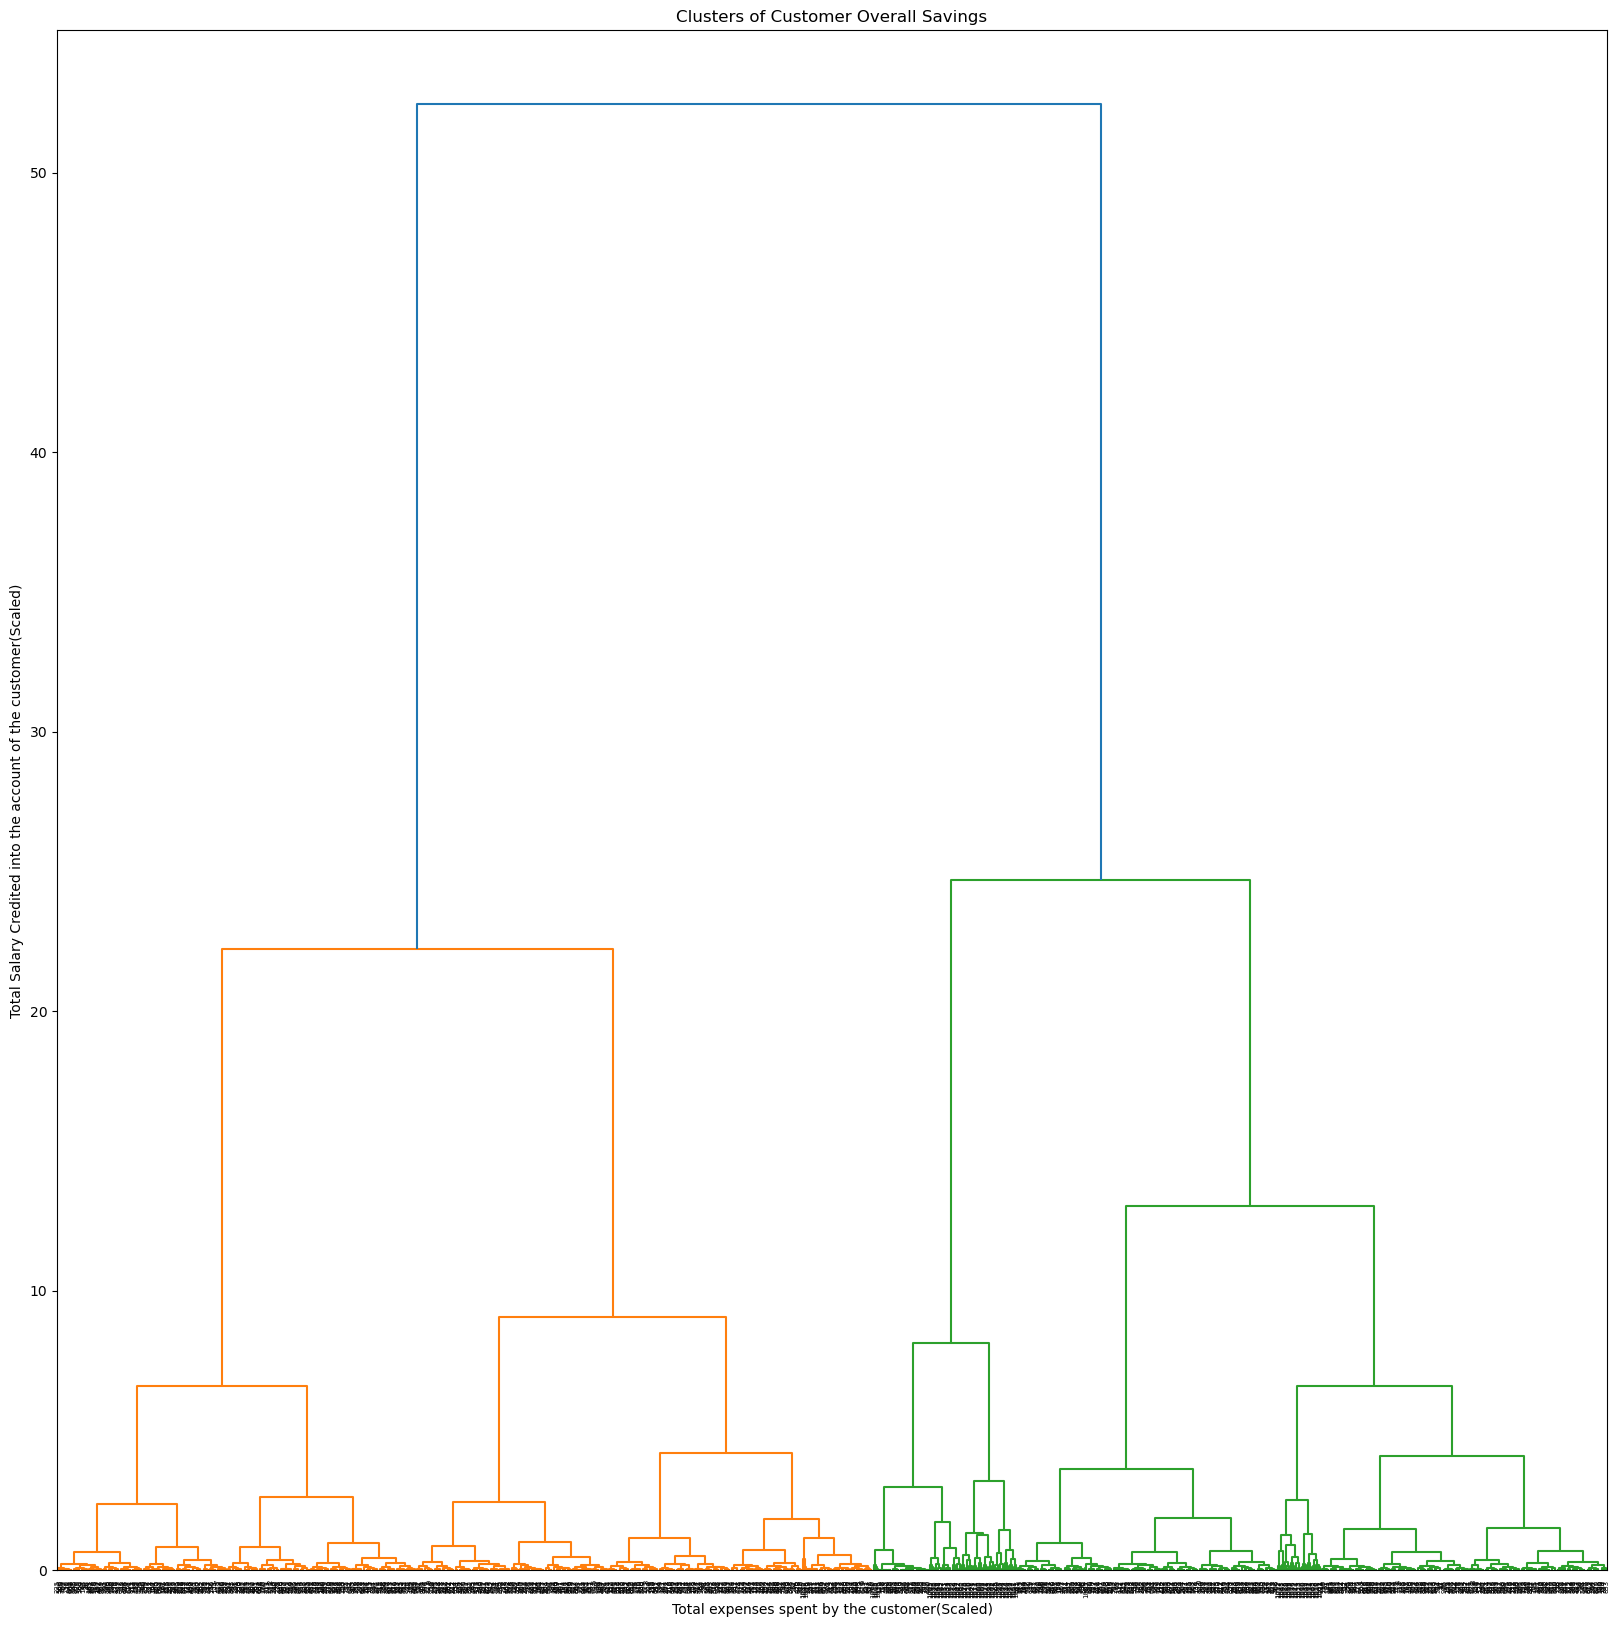

In [33]:
#using the dendogram to find the optimal number of clusters:
import scipy.cluster.hierarchy as sch

plt.figure(figsize =(20,20))
dendrogram_bank = sch.dendrogram(sch.linkage(scaled_output_exp, method = 'ward'))
plt.ylabel('Total Salary Credited into the account of the customer(Scaled)')
plt.xlabel('Total expenses spent by the customer(Scaled)')
plt.title('Clusters of Customer Overall Savings')
plt.show()